In [37]:
import xml.etree.ElementTree as et
import pickle
import collections
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
picklename=[1,2,3,4,5,6]
filename=["00-04","04-08","08-12","12-16","16-20","20-00"]

In [ ]:
# Creating Pickles


for fname,alias in zip(filename,picklename):
    data=OrderedDict()
    tree=et.parse("Data/"+fname+".xml")
    root=tree.findall("host")

    for host in root:
        fport,uptime,lastboot,hname,index,diff,ipidclass,tsclass,srtt,rttvar,to=None,None,None,None,None,None,None,None,None,None,None
        port,proto,rtt=None,None,0.0
        stime=int(host.get("starttime"))       
        etime=int(host.get("endtime"))
        ipv4=host.find(".//address[@addrtype='ipv4']").get("addr")
        statusnode=host.find("status")
        state=statusnode.get("state")
        reason=statusnode.get("reason")
        reason_ttl=float(statusnode.get("reason_ttl"))

        hnode=host.find("./hostnames/hostname")

        #No. of Hops
        hopnum=int(host.find("distance").get("value"))
        if hnode!=None:
            hname=hnode.get("name")

        #Up time
        uptimenode=host.find("uptime")
        if uptimenode!=None:
            uptime=int(uptimenode.get("seconds"))
            lastboot=uptimenode.get("lastboot")
        portnode=host.find(".//ports/extraports[@state='filtered']")
        if portnode!=None:
            fport=portnode.get("count")
        #TCP Sequence    
        tcpnode=host.find("tcpsequence")
        if tcpnode!=None:
            index=int(tcpnode.get("index"))
            diff=tcpnode.get("difficulty")
        #IPIDSequence
        ipid=host.find("ipidsequence")
        if ipid!=None:
            ipidclass=ipid.get("class")
        #TcpTsSequence
        ts=host.find("tcptssequence")
        if ts!=None:
            tsclass=ts.get("class")

        #RTTVAR, SRTT
        times=host.find("times")
        if times!=None:
            srtt=float(times.get("srtt"))
            rttvar=float(times.get("rttvar"))
            to=float(times.get("to"))
        #RTT
        trace=host.find("trace")
        if trace!=None:
            port=trace.get("port")
            proto=trace.get("proto")
            hopinfo=trace.findall("hop")
            for hops in hopinfo:
                rtt=rtt+float(hops.get("rtt"))
        #print(stime,etime,ipv4,fport,uptime,lastboot,hname,hopnum,srtt,rttvar,to,rtt)

        data[ipv4]=[(etime-stime)*1000,state,reason,reason_ttl,hname,uptime,lastboot,fport,hopnum,index,diff,ipidclass,tsclass,srtt,rttvar,to,port,proto,rtt]
    #print(data)
    pickle.dump(data,open("Pickles/"+str(alias)+".pickle","wb"))

In [5]:
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['grid.color']='gainsboro'

In [6]:
datamap={"scantime":0,"state":1,"reason":2,"reason_ttl":3,"hname":4,"uptime":5,"lastboot":6,"fport":7,"hopnum":8,"index":9,"diff":10,"ipidclass":11,"tsclass":12,"srtt":13,"rttvar":14,"to":15,"port":16,"proto":17,"rtt":18}
datamaprev={}
for key in datamap:
    datamaprev[datamap[key]]=key


In [3]:
def print_freq(a):  
    counter=collections.Counter(a)
    for key,value in counter.items():
        print(key,value)

In [4]:



for parameter in range(len(datamap)):
    print(datamaprev[parameter]+"\n")
    time=[]
    for fname,alias in zip(filename,picklename):
        data=pickle.load(open("Pickles/"+str(alias)+".pickle","rb"))
        for ipv4 in data:
            time.append(data[ipv4][parameter])
    print("Possible Values\n")
    print_freq(time)
    

scantime

Possible Values

800 17
704 2
867 19
772 2
1031 19
1423 19
914 2
915 18
667 2
1270 2
1082 18
891 2
state

Possible Values

up 122
reason

Possible Values

reset 2
echo-reply 120
reason_ttl

Possible Values

63.0 42
254.0 6
127.0 74
hname

Possible Values

symantec.pdc.jiit 6
jiitwebsite.pdc.jiit 5
crlog.pdc.jiit 6
None 60
linux 3
fileserver.pdc.jiit 3
oracle.pdc.jiit 6
jiit-main.pdc.jiit 6
counselling.pdc.jiit 6
license-server.pdc.jiit 6
fileserver2.pdc.jiit 6
jbsnameserver.pdc.jiit 6
linux.pdc.jiit 3
uptime

Possible Values

7133657 1
2747779 1
None 64
10085100 1
2779148 1
6477837 1
10099471 1
1516818 1
1037507 1
1013525 1
2566935 1
3114393 1
6453662 1
2598305 1
2801060 1
2762149 1
124252 1
1472045 1
565552 1
1076576 1
2737586 1
3153462 1
2620216 1
2581306 1
270244 1
3099964 1
6453953 1
3417538 1
10075587 1
3131461 1
6463176 1
6516748 1
10138381 1
10755587 1
6494545 1
606435 1
3773177 1
1475672 1
2738265 1
575066 1
2146140 1
2747101 1
1507040 1
2778467 1
1023077 1
1502056 1


In [25]:
def plot_heatmap(scorr,t,ticks):

    plt.close()
    plt.rcParams.update({'font.size': 13})
   
    corr=np.corrcoef(scorr)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap,vmin=0,vmax=1, center=0.5,square=True, cbar_kws={"shrink": .5},annot=True)
    plt.title(t,size=20)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set(ticks=np.arange(0.5, len(ticks)), ticklabels=[c for c in ticks])
    fig = plt.gcf()
    fig.set_size_inches(12, 12)
    plt.show()
    #plt.savefig("Analysis/Heatmap/"+t.replace(" ","_")+".png", bbox_inches='tight')
    plt.clf()

In [299]:
def plot_multiple_parameters(pmeters,path):
    rttdata=OrderedDict()
    rtts=pmeters
    rttspos=[i for i in range(len(pmeters))]

    for mapping,index in zip(rtts,rttspos):
        parameter=datamap[mapping] 
       
        for fname,alias in zip(filename,picklename):
            data=pickle.load(open(path+str(alias)+".pickle","rb"))
            for ipv4 in data:
                if ipv4 not in rttdata:
                    rttdata[ipv4]=[0]*len(pmeters)
                    for i in range(len(pmeters)):
                        rttdata[ipv4][i]=[]
                #print(ipv4,fname,data[ipv4][parameter])
                rttdata[ipv4][index].append(data[ipv4][parameter])
    ###
#     for ipv4 in rttdata:
#         print(len(rttdata[ipv4][0]))
    for i in rttspos:
        remove=[ipv4 for ipv4 in rttdata if len(rttdata[ipv4][i])!=6]
        for r in remove:
            del rttdata[r]
    ###           rttdata[ipv4][index].append(data[ipv4][parameter])
    #print(rttdata)
    plt.close()
    plt.figure(figsize = (12,6),dpi=150)
    #gs = gridspec.GridSpec(3,4)
    #plt.subplot(gs[0,0:2])
    temp=[]
    for parameter,index in zip(rtts,rttspos):
        #print([[rttdata[ipv4][index][i] for ipv4 in rttdata] for i in range(len(filename))])
        if parameter=="rtt":
            parameter="RTTm"
        if parameter=="to":
            parameter="RTO"
        ss=[np.mean([rttdata[ipv4][index][i] for ipv4 in rttdata]) for i in range(len(filename))]
        temp.append(ss)
        plt.scatter([i for i in range(len(filename))],ss)
        plt.plot([i for i in range(len(filename))],ss,label=parameter.upper())
    #plt.plot([i for i in range(len(filename))],[np.std([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))],label="std")
    print(rtts)
    corr=np.corrcoef(temp)
    
    plt.legend(loc='upper right')
    plt.xlabel("Periodic Timeslots")
    plt.ylabel("Measurement(in ms)")
    plt.xticks([i for i in range(0,len(filename))],filename)
    plt.show()
    print("ok")
    return temp

In [18]:
def calc_natural_corr(pmeters,path):
    rttdata=OrderedDict()
    rtts=pmeters
    rttspos=[i for i in range(len(pmeters))]

    for mapping,index in zip(rtts,rttspos):
        parameter=datamap[mapping] 
       
        for fname,alias in zip(filename,picklename):
            data=pickle.load(open(path+str(alias)+".pickle","rb"))
            for ipv4 in data:
                if ipv4 not in rttdata:
                    rttdata[ipv4]=[0]*len(pmeters)
                    for i in range(len(pmeters)):
                        rttdata[ipv4][i]=[]
                #print(ipv4,fname,data[ipv4][parameter])
                rttdata[ipv4][index].append(data[ipv4][parameter])
    ###
#     for ipv4 in rttdata:
#         print(len(rttdata[ipv4][0]))
    for i in rttspos:
        remove=[ipv4 for ipv4 in rttdata if len(rttdata[ipv4][i])!=6]
        for r in remove:
            del rttdata[r]
    ###           rttdata[ipv4][index].append(data[ipv4][parameter])
    
    corr_list=[0]*len(pmeters)
    for i in range(len(pmeters)):
        corr_list[i]=[]
    for ipv4 in rttdata:
        for i in rttspos:
            corr_list[i].extend(rttdata[ipv4][i])
    
    print(rtts)
    corr=np.corrcoef(corr_list)
    print(corr)
    
    print("ok")
    return corr_list

['rtt', 'srtt', 'rttvar', 'to', 'scantime']
[[ 1.          0.78912775  0.83491446  0.80744834  0.72918248]
 [ 0.78912775  1.          0.95052515  0.90909275  0.77976121]
 [ 0.83491446  0.95052515  1.          0.93025207  0.76079746]
 [ 0.80744834  0.90909275  0.93025207  1.          0.73653182]
 [ 0.72918248  0.77976121  0.76079746  0.73653182  1.        ]]
ok


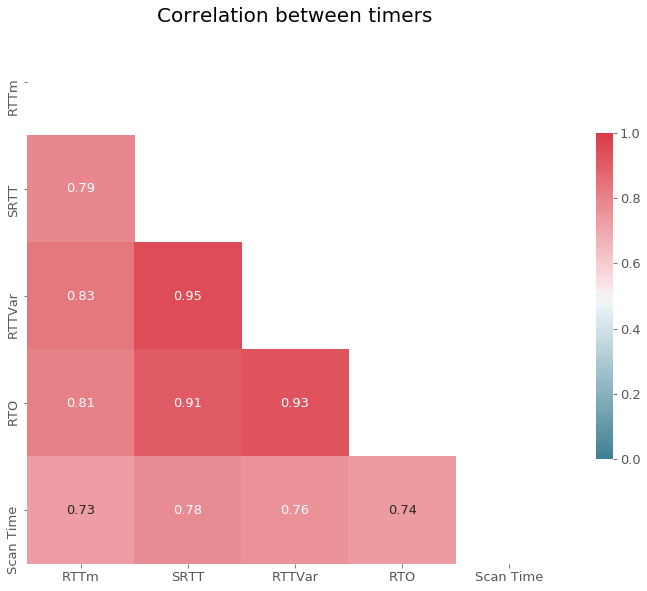

In [26]:
parameters=["rtt","srtt","rttvar","to","scantime"]
ticks=["RTTm","SRTT","RTTVar","RTO","Scan Time"]
corr=calc_natural_corr(parameters,"Pickles/")
plot_heatmap(corr,"Correlation between timers",ticks)

['rtt', 'srtt', 'rttvar', 'to', 'scantime']


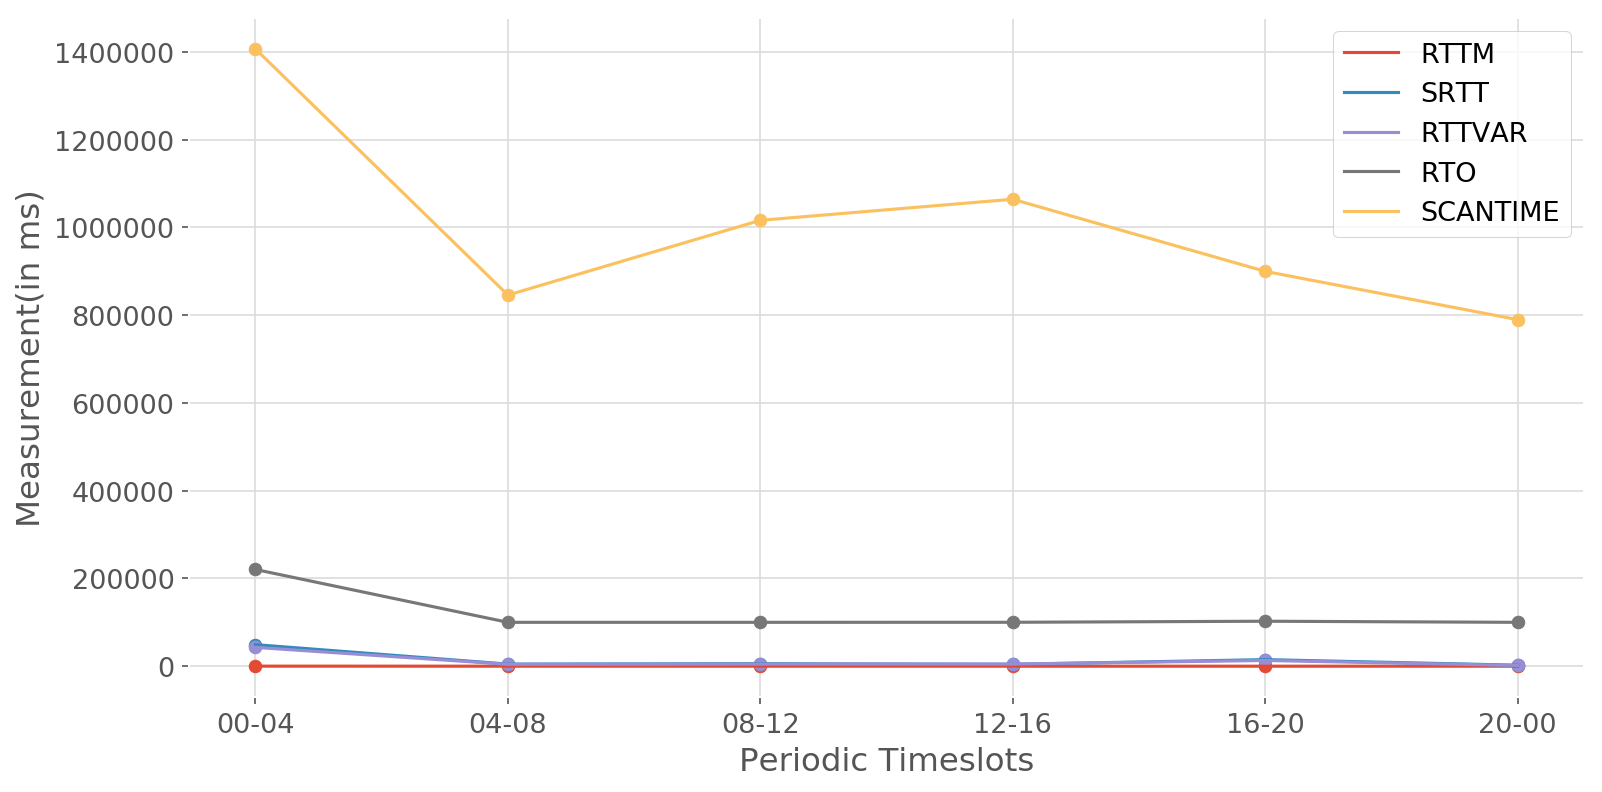

ok
[[128.54578947368424, 11.744736842105262, 17.777894736842104, 3.4573684210526316, 15.624210526315791, 6.2573684210526315], [49111.84210526316, 4770.5263157894733, 5690.105263157895, 4282.3684210526317, 15019.0, 2311.1578947368421], [42832.368421052633, 4307.6315789473683, 4833.8421052631575, 4922.105263157895, 13040.631578947368, 1728.3684210526317], [220441.31578947368, 100000.0, 100000.0, 100109.57894736843, 102505.63157894737, 100000.0], [1406894.7368421052, 845947.36842105258, 1016263.1578947369, 1064315.7894736843, 899947.36842105258, 789894.73684210528]]


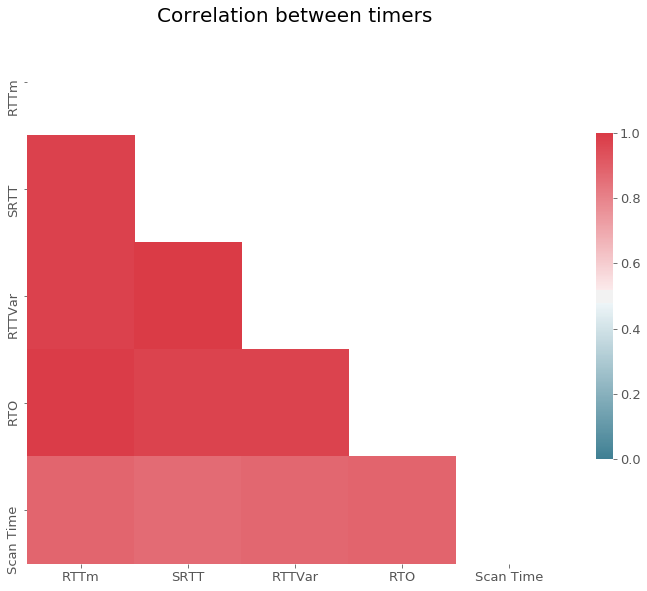

In [311]:
corr=plot_multiple_parameters(["rtt","srtt","rttvar","to","scantime"],"Pickles/")

plot_heatmap(corr,"Correlation between timers",["RTTm","SRTT","RTTVar","RTO","Scan Time"])

In [208]:
# Analyzing corelation between rtt,srtt, rttvar and to
def analyze_and_plotcorr(pmeters,path):
    rttdata=OrderedDict()
    rtts=pmeters
    rttspos=[i for i in range(len(pmeters))]

    for mapping,index in zip(rtts,rttspos):
        parameter=datamap[mapping] 
       
        for fname,alias in zip(filename,picklename):
            data=pickle.load(open(path+str(alias)+".pickle","rb"))
            for ipv4 in data:
                if ipv4 not in rttdata:
                    rttdata[ipv4]=[0]*len(pmeters)
                    for i in range(len(pmeters)):
                        rttdata[ipv4][i]=[]
                #print(ipv4,fname,data[ipv4][parameter])
                rttdata[ipv4][index].append(data[ipv4][parameter])

   
    
    print("Mean Corr")
    matrix_sum = np.zeros(shape=(len(pmeters),len(pmeters)))
    for ipv4 in rttdata:
        matrix_sum=matrix_sum+np.corrcoef(rttdata[ipv4])
    print(matrix_sum/len(rttdata))
    
    print("\n\n\nIndividual Corr")
    print(rttdata)
    for ipv4 in rttdata:
        print(ipv4)
        print(np.corrcoef(rttdata[ipv4]))

   
    for ipv4 in rttdata:
        flag=0
        for data,rtt in zip(rttdata[ipv4],rtts):
            if len(data)==len(filename):
                flag=1
                plt.plot([i for i in range(0,len(filename))],data,label=rtt)
        if flag==1:
            plt.legend(loc='upper right')
            plt.xticks([i for i in range(0,len(filename))],filename)
            plt.title(ipv4)
            plt.show()
            flag=0
       
    return rttdata

{'index': 9, 'port': 16, 'state': 1, 'uptime': 5, 'proto': 17, 'to': 15, 'rttvar': 14, 'tsclass': 12, 'fport': 7, 'hopnum': 8, 'ipidclass': 11, 'reason_ttl': 3, 'srtt': 13, 'diff': 10, 'scantime': 0, 'rtt': 18, 'lastboot': 6, 'reason': 2, 'hname': 4}
Mean Corr
[[ 1.          0.92371299  0.92458957  0.93564857  0.8395975 ]
 [ 0.92371299  1.          0.98160455  0.94547967  0.84099453]
 [ 0.92458957  0.98160455  1.          0.9122287   0.82880824]
 [ 0.93564857  0.94547967  0.9122287   1.          0.88745908]
 [ 0.8395975   0.84099453  0.82880824  0.88745908  1.        ]]



Individual Corr
172.16.68.1
[[ 1.          0.93942911  0.90999346  0.99905074  0.88036463]
 [ 0.93942911  1.          0.99200866  0.92921586  0.850844  ]
 [ 0.90999346  0.99200866  1.          0.90157171  0.85811875]
 [ 0.99905074  0.92921586  0.90157171  1.          0.88506329]
 [ 0.88036463  0.850844    0.85811875  0.88506329  1.        ]]
172.16.68.2
[[ 1.          0.94724675  0.87242547  0.99888509  0.87289163]
 

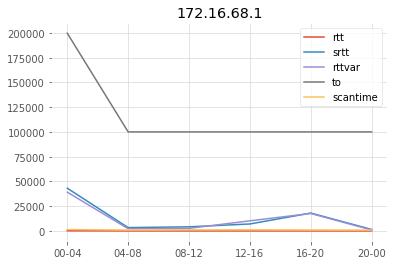

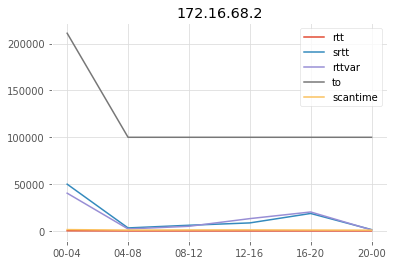

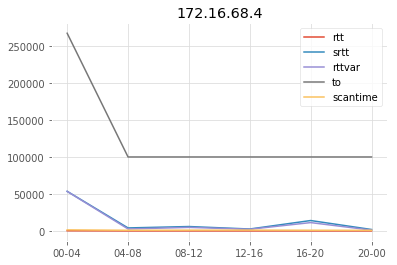

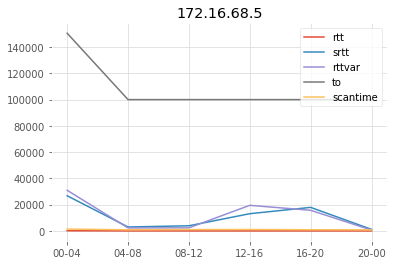

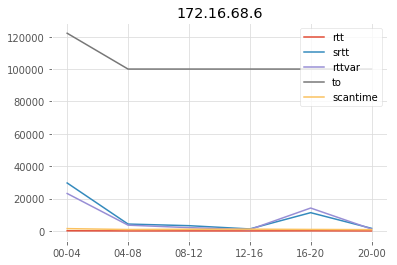

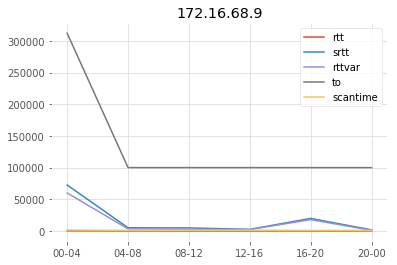

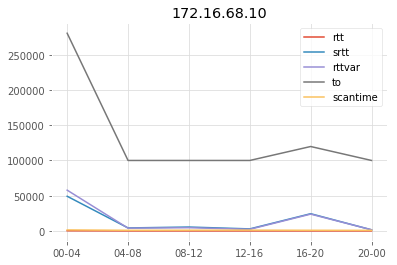

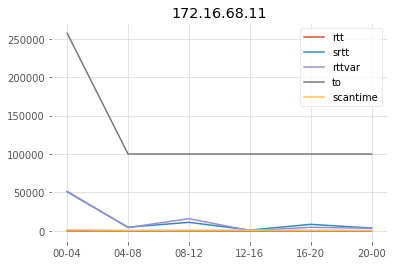

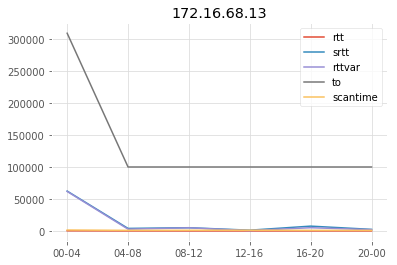

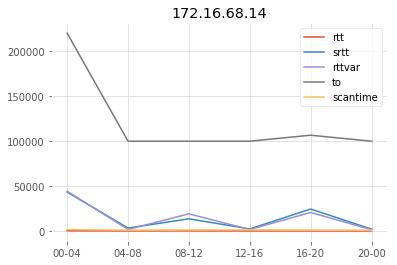

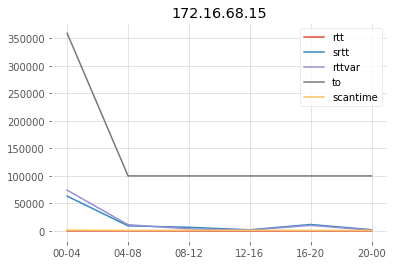

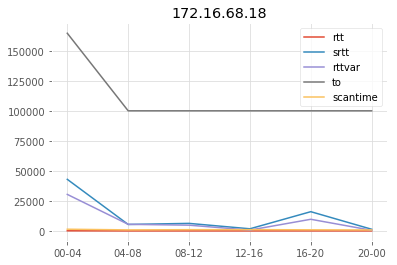

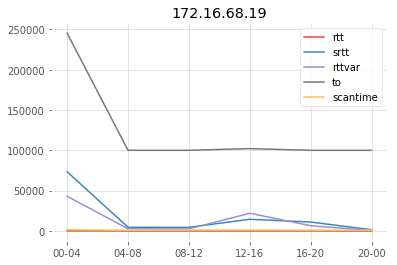

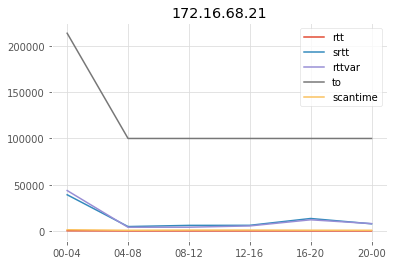

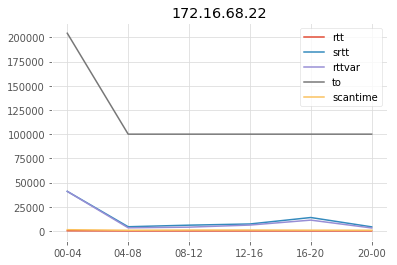

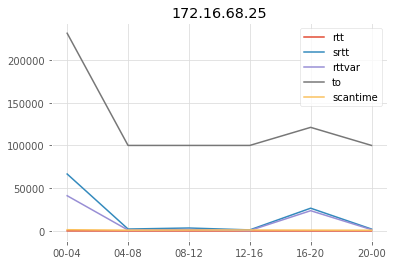

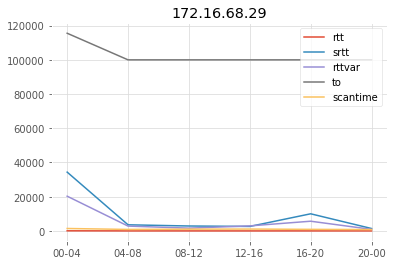

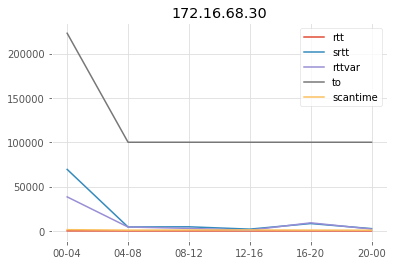

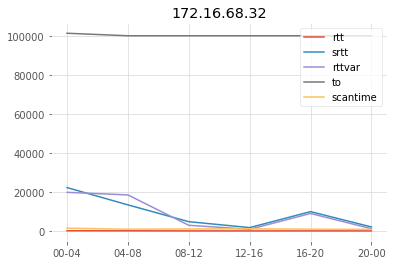

In [157]:
print(datamap)
rttdata=analyze_and_plotcorr(["rtt","srtt","rttvar","to","scantime"])


In [99]:
 def plot_parameters(pm,path,title):
    rttdata=OrderedDict()
    import seaborn as sns
    rtts=[pm]
    rttspos=[0]
   
    print(pm+"\n")
    for mapping,index in zip(rtts,rttspos):
        parameter=datamap[mapping]   
        for fname,alias in zip(filename,picklename):
            data=pickle.load(open(path+str(alias)+".pickle","rb"))
            for ipv4 in data:
                if ipv4 not in rttdata:
                    rttdata[ipv4]=[]
                rttdata[ipv4].append(data[ipv4][parameter])


    ###
    remove=[ipv4 for ipv4 in rttdata if len(rttdata[ipv4])!=6]
    for r in remove:
        del rttdata[r]
    ###
    plt.close()
   
    plt.subplots(figsize=(16,8))
    
    for ipv4 in rttdata:
        data=rttdata[ipv4]
        plt.plot([i for i in range(0,len(filename))],data,label=ipv4)
    plt.legend(loc='upper right')
    plt.xticks([i for i in range(0,len(filename))],filename)
    plt.title(pm+" parameter among users")
    plt.show()
    


    plt.close()
    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize = (12,8),dpi=110)
    gs = gridspec.GridSpec(3,4)
    plt.subplot(gs[0,0:2])
    datamean=[np.var([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))]
    print([[rttdata[ipv4][i] for ipv4 in rttdata] for i in range(len(filename))])
    print("\n",datamean)
    plt.plot([i for i in range(len(filename))],[np.mean([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))],label="Mean")
    plt.plot([i for i in range(len(filename))],[np.std([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))],label="StD")
    
    plt.scatter([i for i in range(len(filename))],[np.mean([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))])
    plt.scatter([i for i in range(len(filename))],[np.std([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))])
    
    
    plt.xticks([i for i in range(0,len(filename))],filename)
    plt.yticks(np.arange(0, max(datamean)+1, int(max(datamean)/7)))
    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel("4-hourly Timeslots")
    plt.ylabel("Time measurement (in ms)")
    
    plt.subplot(gs[0,2:4])
    plt.plot([i for i in range(len(filename))],[np.mean([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))],label="Mean")
    plt.plot([i for i in range(len(filename))],[np.std([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))],label="StD")
    plt.plot([i for i in range(len(filename))],[np.var([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))],label="Var")
    
    plt.scatter([i for i in range(len(filename))],[np.mean([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))])
    plt.scatter([i for i in range(len(filename))],[np.std([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))])
    plt.scatter([i for i in range(len(filename))],[np.var([rttdata[ipv4][i] for ipv4 in rttdata]) for i in range(len(filename))])
   
    
    plt.xticks([i for i in range(0,len(filename))],filename)

    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel("4-hourly Timeslots")
    plt.ylabel("Time measurement (in ms)")
    plt.tight_layout()
    plt.show()

to



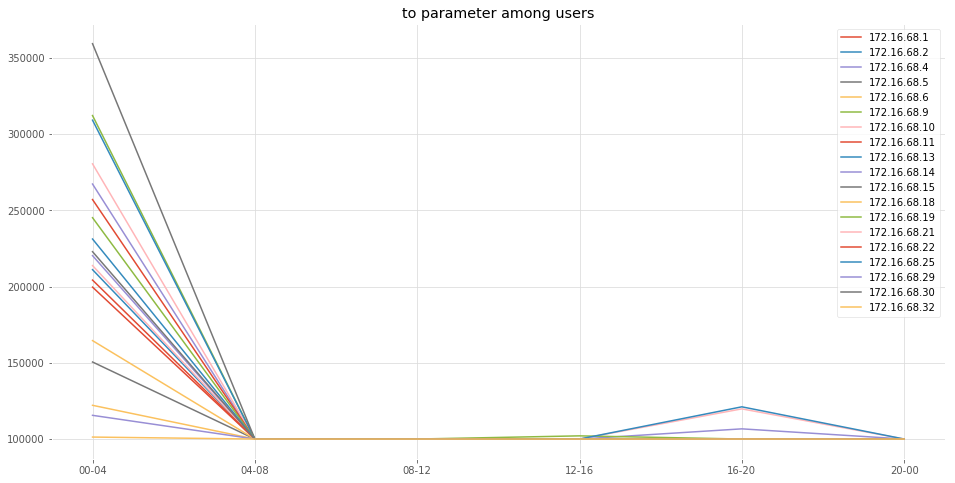

[[199663.0, 211115.0, 267304.0, 150534.0, 122128.0, 312224.0, 280539.0, 257119.0, 309194.0, 220328.0, 359373.0, 164578.0, 245212.0, 213808.0, 204283.0, 231226.0, 115550.0, 222918.0, 101289.0], [100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0], [100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0], [100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 102082.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0], [100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 119788.0, 100000.0, 100000.0, 106681.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 121138.0, 100000.0, 100000.0, 100000.0], [100000.0, 100000.0, 100000.0, 100000.0

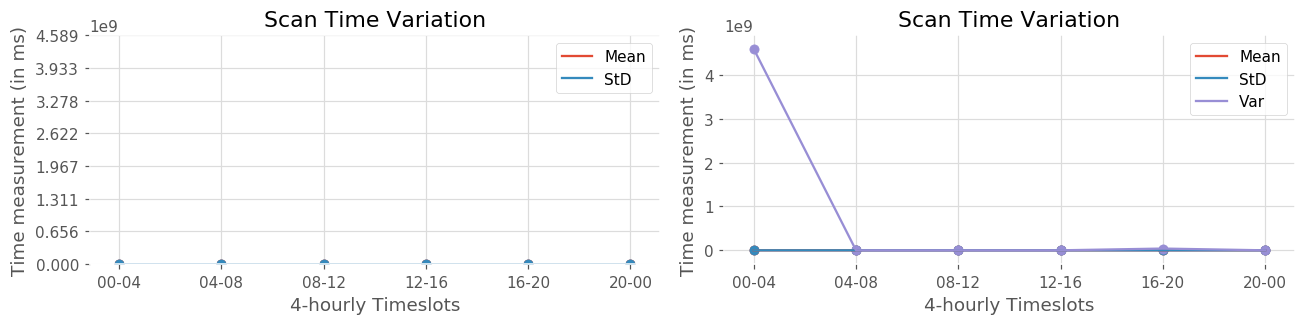

In [100]:
plot_parameters("to","Pickles/","Scan Time Variation")

to



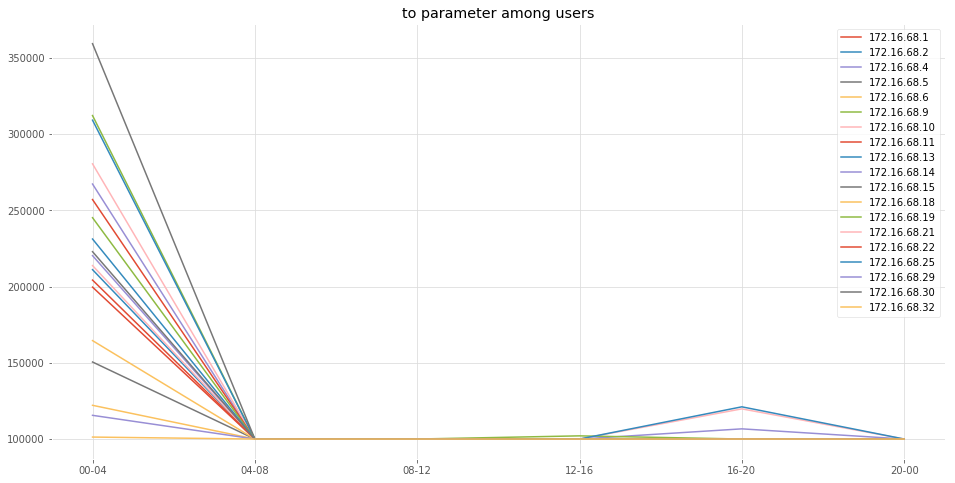

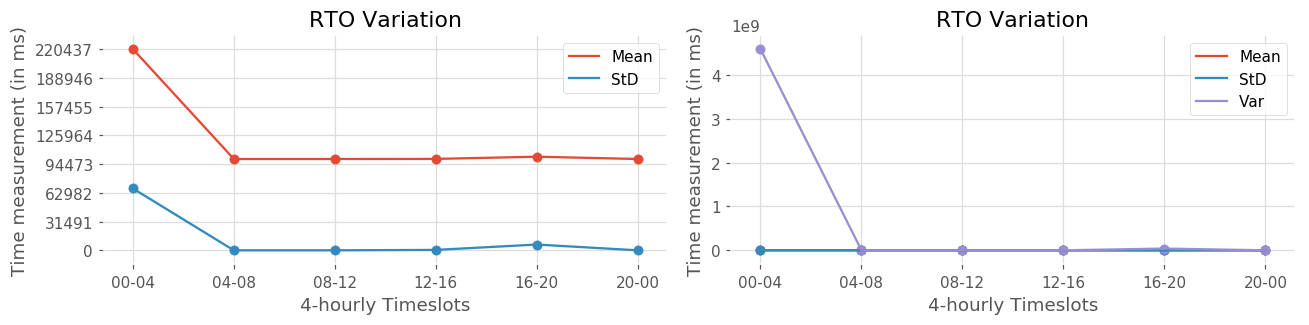

In [89]:
plot_parameters("to","Pickles/","RTO Variation")

Mean Corr
[[ 1.          0.92371299  0.92458957  0.93564857  0.8395975 ]
 [ 0.92371299  1.          0.98160455  0.94547967  0.84099453]
 [ 0.92458957  0.98160455  1.          0.9122287   0.82880824]
 [ 0.93564857  0.94547967  0.9122287   1.          0.88745908]
 [ 0.8395975   0.84099453  0.82880824  0.88745908  1.        ]]



Individual Corr
172.16.68.1
[[ 1.          0.93942911  0.90999346  0.99905074  0.88036463]
 [ 0.93942911  1.          0.99200866  0.92921586  0.850844  ]
 [ 0.90999346  0.99200866  1.          0.90157171  0.85811875]
 [ 0.99905074  0.92921586  0.90157171  1.          0.88506329]
 [ 0.88036463  0.850844    0.85811875  0.88506329  1.        ]]
172.16.68.2
[[ 1.          0.94724675  0.87242547  0.99888509  0.87289163]
 [ 0.94724675  1.          0.979302    0.94386457  0.879808  ]
 [ 0.87242547  0.979302    1.          0.87246459  0.86476444]
 [ 0.99888509  0.94386457  0.87246459  1.          0.88506329]
 [ 0.87289163  0.879808    0.86476444  0.88506329  1.        ]]

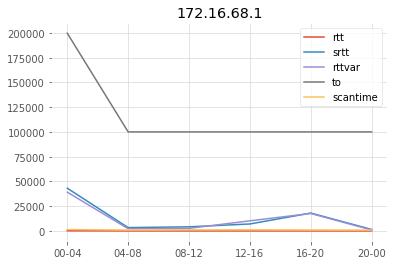

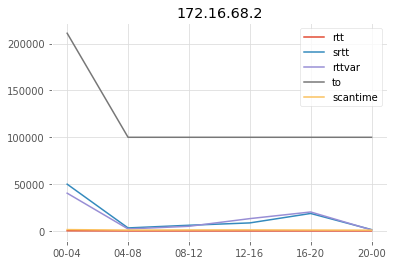

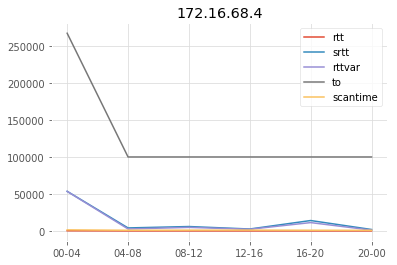

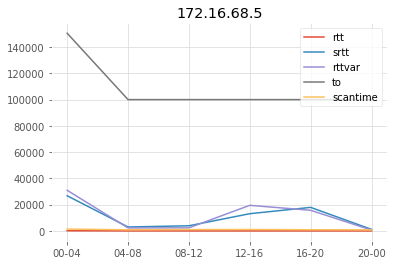

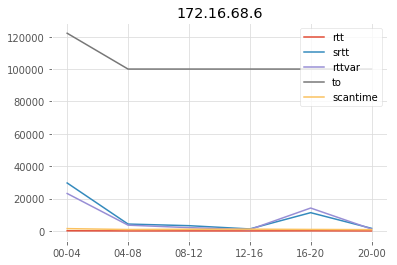

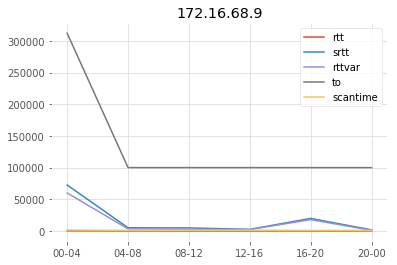

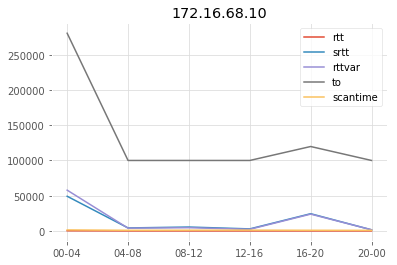

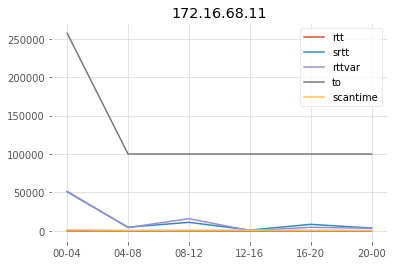

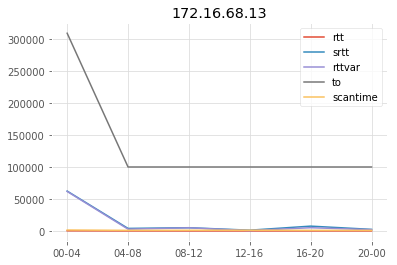

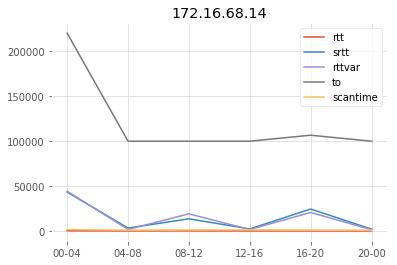

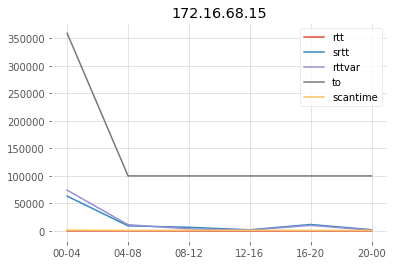

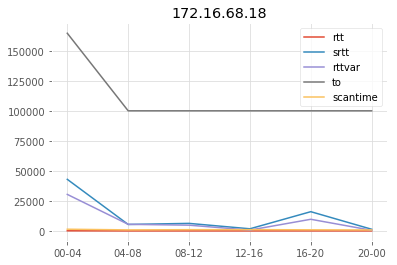

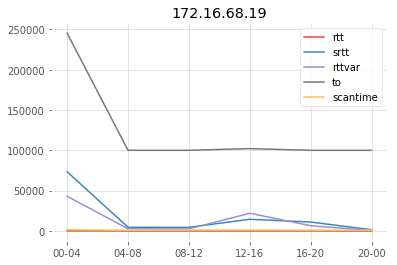

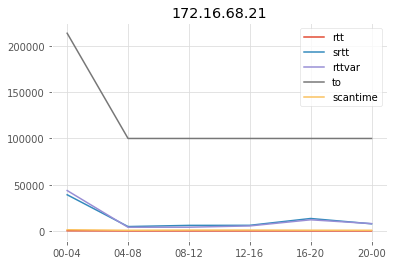

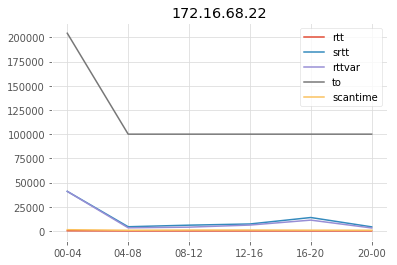

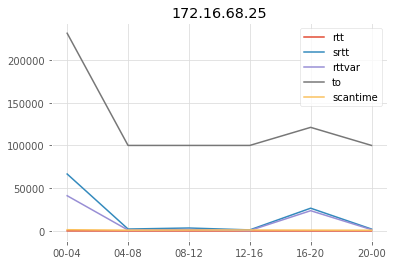

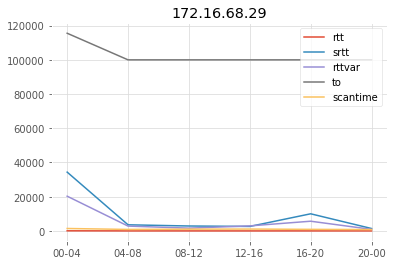

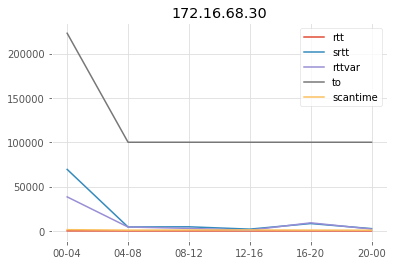

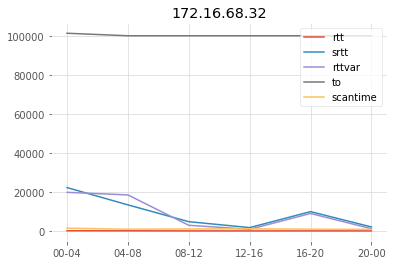

In [173]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","to","scantime"],"Pickles/")

172.16.68.13 00-04 221.66000000000003
172.16.68.25 00-04 51.660000000000004
172.16.68.10 00-04 221.72000000000003
172.16.68.9 00-04 215.76
172.16.68.19 00-04 79.28
172.16.68.8 00-04 195.45
172.16.68.1 00-04 147.7
172.16.68.18 00-04 99.67
172.16.68.11 00-04 51.03
172.16.68.15 00-04 49.5
172.16.68.14 00-04 170.89
172.16.68.6 00-04 81.53
172.16.68.32 00-04 91.84
172.16.68.4 00-04 221.79000000000002
172.16.68.2 00-04 166.24
172.16.68.5 00-04 115.29
172.16.68.31 00-04 91.89
172.16.68.30 00-04 65.44
172.16.68.13 04-08 11.85
172.16.68.25 04-08 6.46
172.16.68.10 04-08 11.84
172.16.68.9 04-08 11.870000000000001
172.16.68.19 04-08 6.04
172.16.68.8 04-08 11.860000000000001
172.16.68.1 04-08 5.859999999999999
172.16.68.18 04-08 6.5
172.16.68.11 04-08 9.39
172.16.68.15 04-08 30.580000000000002
172.16.68.14 04-08 4.63
172.16.68.6 04-08 7.33
172.16.68.32 04-08 50.919999999999995
172.16.68.4 04-08 11.91
172.16.68.2 04-08 10.74
172.16.68.5 04-08 11.88
172.16.68.31 04-08 6.470000000000001
172.16.68.30 0

172.16.68.18 00-04 1423
172.16.68.11 00-04 1423
172.16.68.15 00-04 1423
172.16.68.14 00-04 1423
172.16.68.6 00-04 1423
172.16.68.32 00-04 1423
172.16.68.4 00-04 1423
172.16.68.2 00-04 1423
172.16.68.5 00-04 1423
172.16.68.31 00-04 1423
172.16.68.30 00-04 1423
172.16.68.13 04-08 867
172.16.68.25 04-08 867
172.16.68.10 04-08 867
172.16.68.9 04-08 867
172.16.68.19 04-08 867
172.16.68.8 04-08 867
172.16.68.1 04-08 867
172.16.68.18 04-08 867
172.16.68.11 04-08 867
172.16.68.15 04-08 867
172.16.68.14 04-08 867
172.16.68.6 04-08 867
172.16.68.32 04-08 867
172.16.68.4 04-08 867
172.16.68.2 04-08 867
172.16.68.5 04-08 867
172.16.68.31 04-08 867
172.16.68.30 04-08 867
172.16.68.13 08-12 1031
172.16.68.25 08-12 1031
172.16.68.10 08-12 1031
172.16.68.9 08-12 1031
172.16.68.19 08-12 1031
172.16.68.8 08-12 1031
172.16.68.1 08-12 1031
172.16.68.18 08-12 1031
172.16.68.11 08-12 1031
172.16.68.15 08-12 1031
172.16.68.14 08-12 1031
172.16.68.6 08-12 1031
172.16.68.32 08-12 1031
172.16.68.4 08-12 1031
17

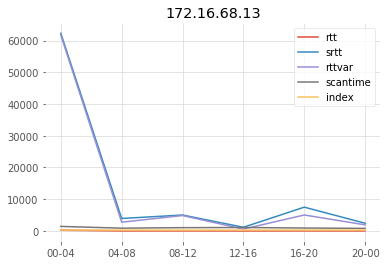

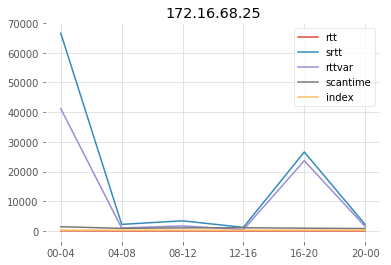

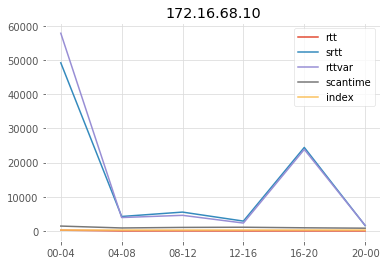

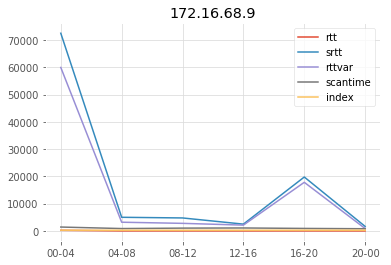

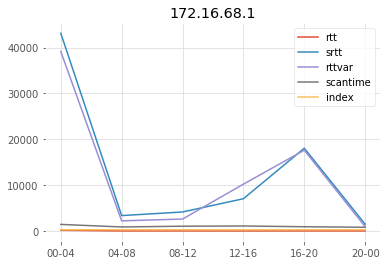

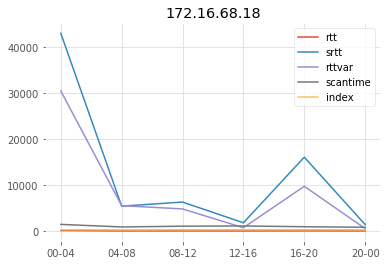

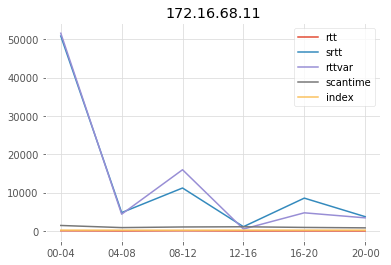

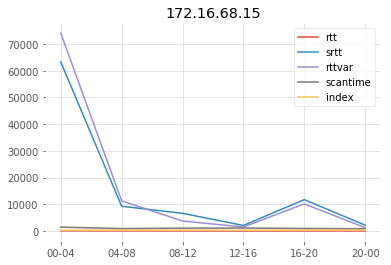

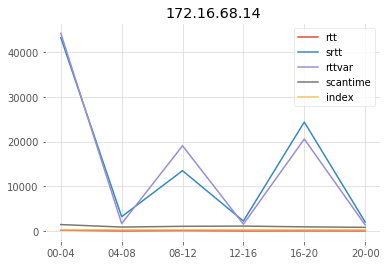

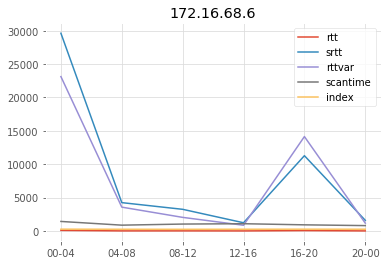

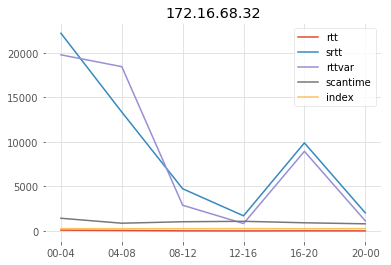

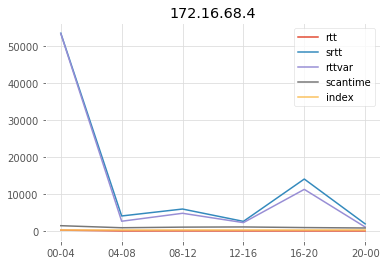

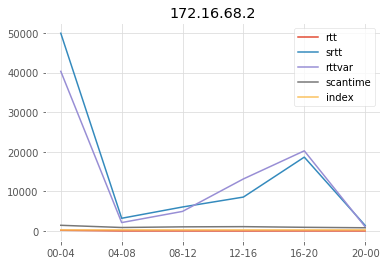

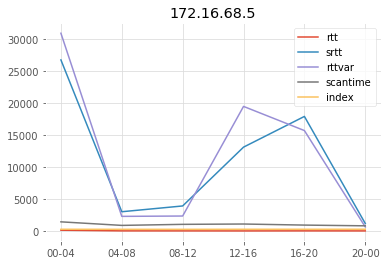

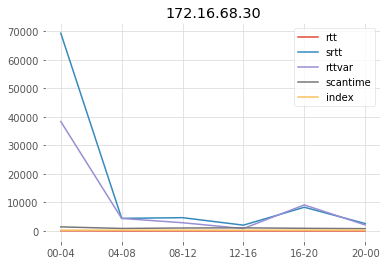

In [194]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime","index"],"Pickles/IndexNotNull/")

172.16.68.11 00-04 982
172.16.68.22 00-04 1000
172.16.68.15 00-04 996
172.16.68.21 00-04 1000
172.16.68.6 00-04 996
172.16.68.11 04-08 982
172.16.68.22 04-08 1000
172.16.68.15 04-08 996
172.16.68.21 04-08 1000
172.16.68.6 04-08 996
172.16.68.11 08-12 982
172.16.68.22 08-12 1000
172.16.68.15 08-12 996
172.16.68.21 08-12 1000
172.16.68.6 08-12 996
172.16.68.11 12-16 982
172.16.68.22 12-16 1000
172.16.68.15 12-16 996
172.16.68.21 12-16 1000
172.16.68.6 12-16 996
172.16.68.11 16-20 982
172.16.68.22 16-20 1000
172.16.68.15 16-20 996
172.16.68.21 16-20 1000
172.16.68.6 16-20 996
172.16.68.11 20-00 982
172.16.68.22 20-00 1000
172.16.68.15 20-00 996
172.16.68.21 20-00 1000
172.16.68.6 20-00 996
Mean Corr
[[ nan]]



Individual Corr
172.16.68.11
nan
172.16.68.22
nan
172.16.68.15
nan
172.16.68.21
nan
172.16.68.6
nan


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3165: RuntimeWarning: invalid value encountered in true_divide
  return c / c


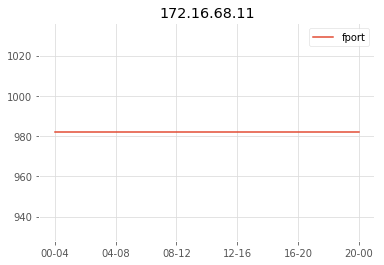

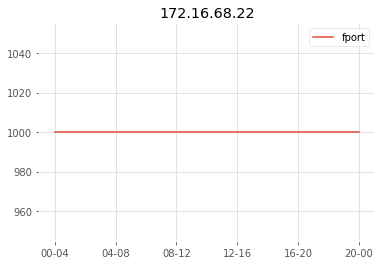

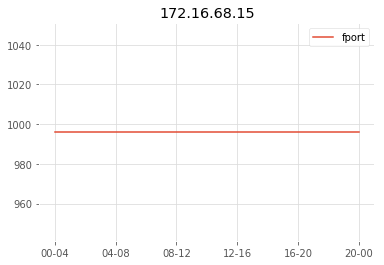

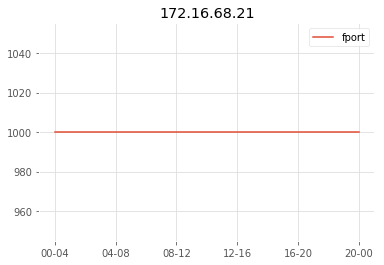

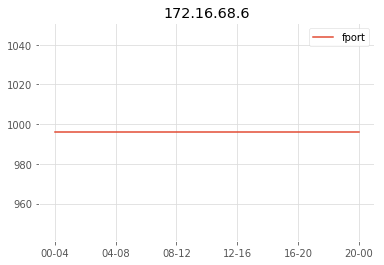

In [192]:
rtt_data=analyze_and_plotcorr(["fport"],"Pickles/FportNotNull/")

172.16.68.21 00-04 162.94
172.16.68.22 00-04 162.89999999999998
172.16.68.21 04-08 5.8
172.16.68.22 04-08 6.63
172.16.68.21 08-12 13.190000000000001
172.16.68.22 08-12 12.74
172.16.68.21 12-16 4.42
172.16.68.22 12-16 4.57
172.16.68.21 16-20 8.23
172.16.68.22 16-20 11.64
172.16.68.21 20-00 5.15
172.16.68.22 20-00 6.640000000000001
172.16.68.21 00-04 39108.0
172.16.68.22 00-04 40855.0
172.16.68.21 04-08 4708.0
172.16.68.22 04-08 4315.0
172.16.68.21 08-12 5979.0
172.16.68.22 08-12 5946.0
172.16.68.21 12-16 6047.0
172.16.68.22 12-16 7180.0
172.16.68.21 16-20 13442.0
172.16.68.22 16-20 13844.0
172.16.68.21 20-00 7687.0
172.16.68.22 20-00 4197.0
172.16.68.21 00-04 43675.0
172.16.68.22 00-04 40857.0
172.16.68.21 04-08 3948.0
172.16.68.22 04-08 3222.0
172.16.68.21 08-12 4029.0
172.16.68.22 08-12 3896.0
172.16.68.21 12-16 5408.0
172.16.68.22 12-16 6049.0
172.16.68.21 16-20 12034.0
172.16.68.22 16-20 11160.0
172.16.68.21 20-00 7917.0
172.16.68.22 20-00 3046.0
172.16.68.21 00-04 1270
172.16.68.22

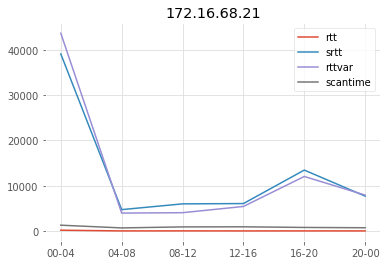

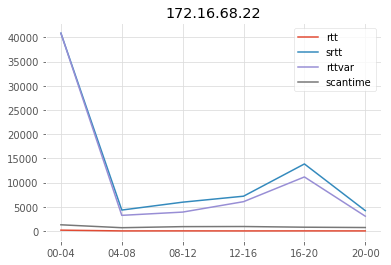

In [193]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/ProtoICMP/")

172.16.68.13 00-04 221.66000000000003
172.16.68.25 00-04 51.660000000000004
172.16.68.10 00-04 221.72000000000003
172.16.68.9 00-04 215.76
172.16.68.29 00-04 65.53
172.16.68.19 00-04 79.28
172.16.68.8 00-04 195.45
172.16.68.1 00-04 147.7
172.16.68.18 00-04 99.67
172.16.68.11 00-04 51.03
172.16.68.15 00-04 49.5
172.16.68.14 00-04 170.89
172.16.68.6 00-04 81.53
172.16.68.32 00-04 91.84
172.16.68.4 00-04 221.79000000000002
172.16.68.2 00-04 166.24
172.16.68.5 00-04 115.29
172.16.68.31 00-04 91.89
172.16.68.30 00-04 65.44
172.16.68.13 04-08 11.85
172.16.68.25 04-08 6.46
172.16.68.10 04-08 11.84
172.16.68.9 04-08 11.870000000000001
172.16.68.29 04-08 6.45
172.16.68.19 04-08 6.04
172.16.68.8 04-08 11.860000000000001
172.16.68.1 04-08 5.859999999999999
172.16.68.18 04-08 6.5
172.16.68.11 04-08 9.39
172.16.68.15 04-08 30.580000000000002
172.16.68.14 04-08 4.63
172.16.68.6 04-08 7.33
172.16.68.32 04-08 50.919999999999995
172.16.68.4 04-08 11.91
172.16.68.2 04-08 10.74
172.16.68.5 04-08 11.88
17

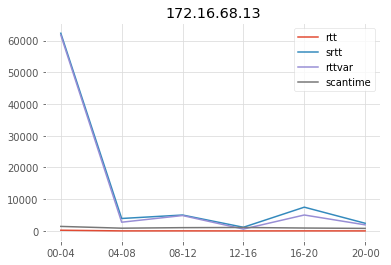

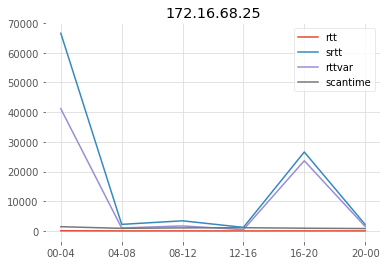

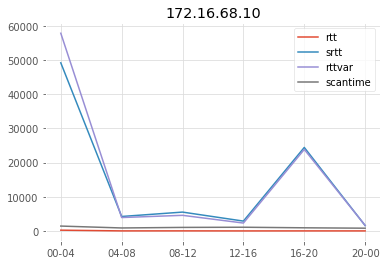

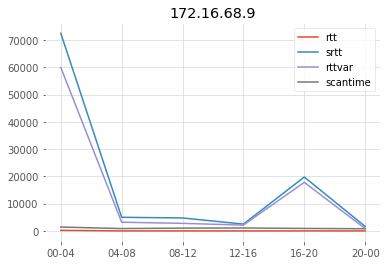

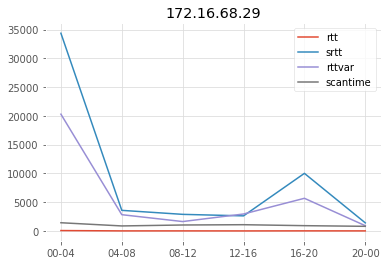

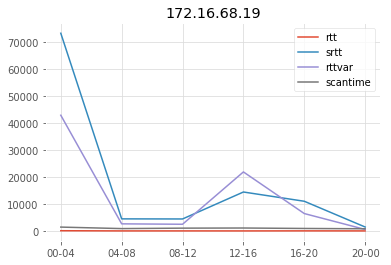

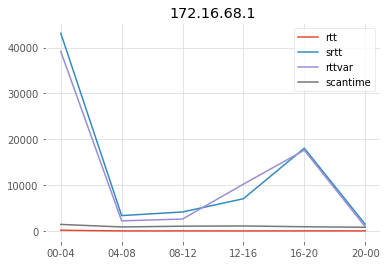

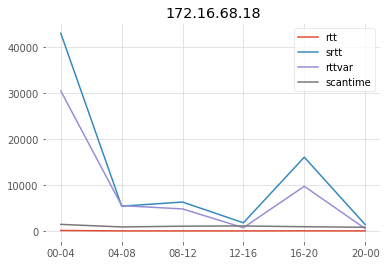

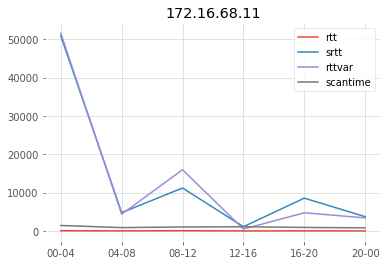

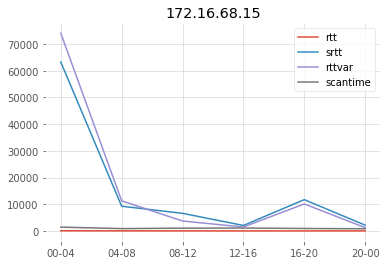

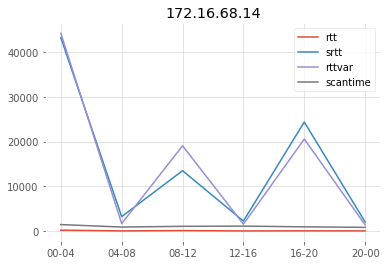

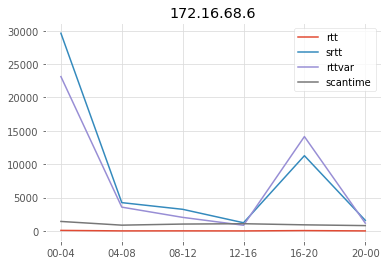

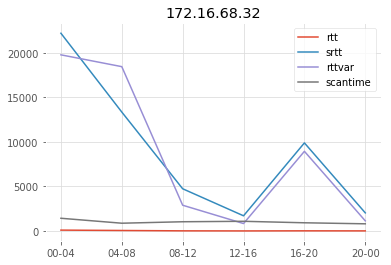

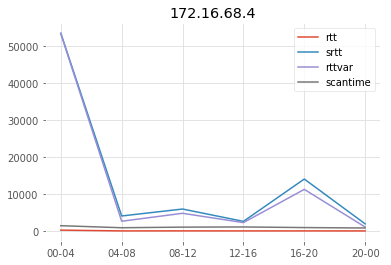

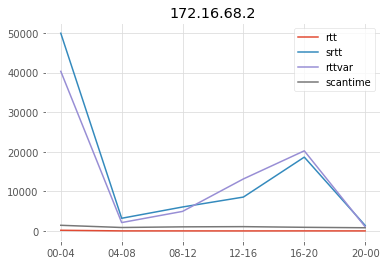

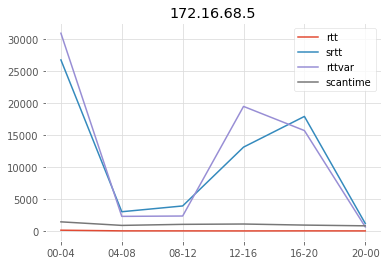

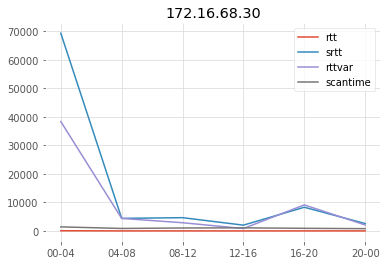

In [195]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/ProtoTCP/")

Mean Corr
[[ 1.          0.87926268  0.8783294   0.88036   ]
 [ 0.87926268  1.          0.98511285  0.81099839]
 [ 0.8783294   0.98511285  1.          0.83461325]
 [ 0.88036     0.81099839  0.83461325  1.        ]]



Individual Corr
OrderedDict([('172.16.68.5', [[115.29, 11.88, 8.57, 2.73, 11.32, 4.88], [26766.0, 3005.0, 3910.0, 13116.0, 17922.0, 1163.0], [30942.0, 2280.0, 2334.0, 19490.0, 15708.0, 629.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.8', [[195.45, 11.860000000000001, 20.42, 3.5100000000000002, 17.07], [49290.0, 4585.0, 5165.0, 15147.0, 27809.0], [50827.0, 2807.0, 5167.0, 21529.0, 25181.0], [1423, 867, 1031, 1082, 915]]), ('172.16.68.10', [[221.72000000000003, 11.84, 19.29, 3.95, 11.3, 7.82], [49183.0, 4228.0, 5510.0, 2877.0, 24428.0, 1566.0], [57839.0, 3917.0, 4564.0, 2303.0, 23840.0, 1606.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.30', [[65.44, 6.470000000000001, 11.05, 2.33, 12.280000000000001, 6.87], [69374.0, 4410.0, 4649.0, 2022.0, 8309.0, 2588.0], 

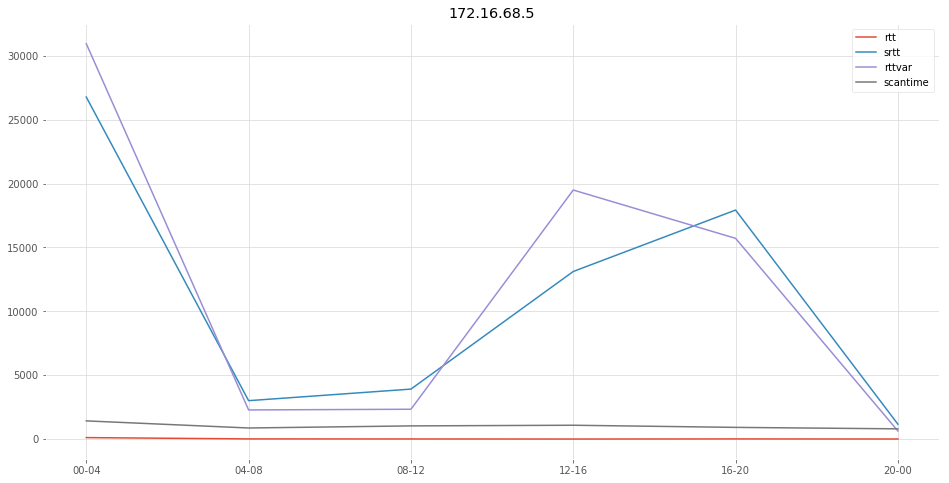

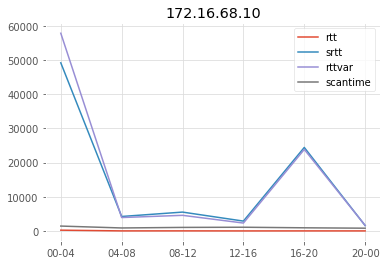

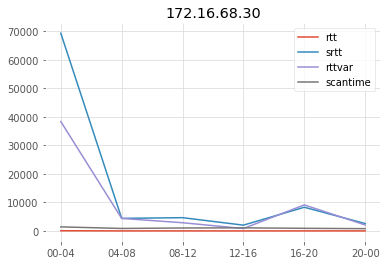

rtt



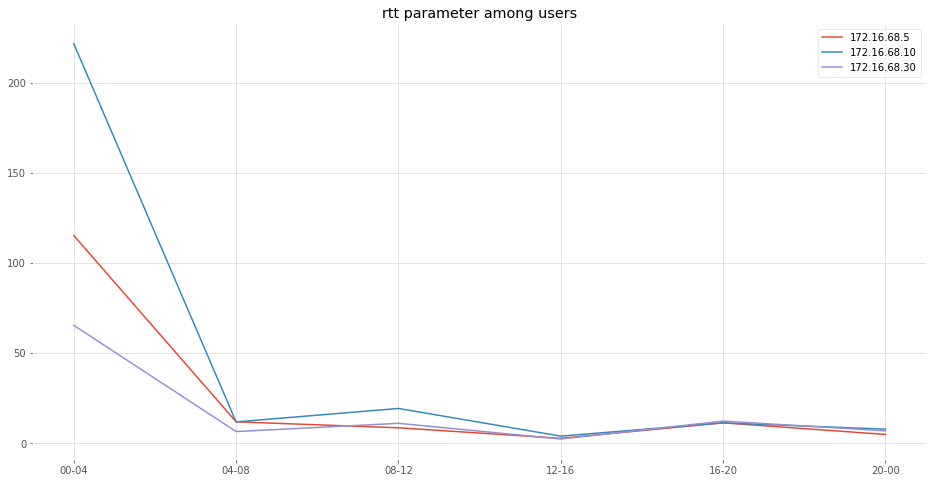

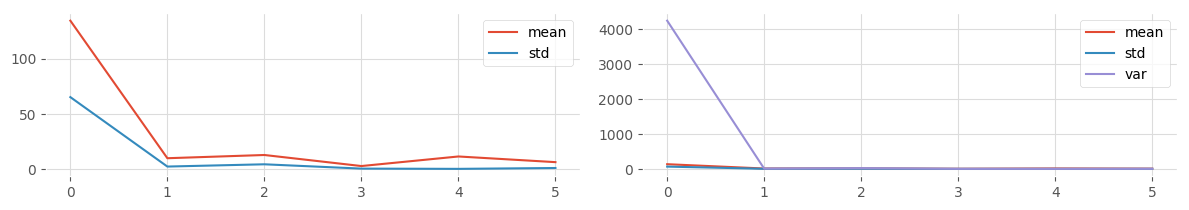

In [211]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/BusyServer/")
plot_parameters("rtt","Pickles/BusyServer/")

Mean Corr
[[ 1.          0.95897486  0.90902374  0.77122146]
 [ 0.95897486  1.          0.96692875  0.7163273 ]
 [ 0.90902374  0.96692875  1.          0.57060803]
 [ 0.77122146  0.7163273   0.57060803  1.        ]]



Individual Corr
OrderedDict([('172.16.68.32', [[91.84, 50.919999999999995, 10.99, 1.96, 12.26, 6.04], [22197.0, 13348.0, 4735.0, 1699.0, 9884.0, 2028.0], [19773.0, 18446.0, 2887.0, 829.0, 8939.0, 1133.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.25', [[51.660000000000004, 6.46, 11.100000000000001, 3.06, 12.370000000000001, 5.9], [66574.0, 2209.0, 3404.0, 1196.0, 26582.0, 2164.0], [41163.0, 982.0, 1687.0, 435.0, 23639.0, 1488.0], [1423, 867, 1031, 1082, 915, 800]])])
172.16.68.32
[[ 1.          0.95632293  0.91458576  0.6794388 ]
 [ 0.95632293  1.          0.94901004  0.63249265]
 [ 0.91458576  0.94901004  1.          0.42232599]
 [ 0.6794388   0.63249265  0.42232599  1.        ]]
172.16.68.25
[[ 1.          0.96162679  0.90346172  0.86300412]
 [ 0.96162679  1.    

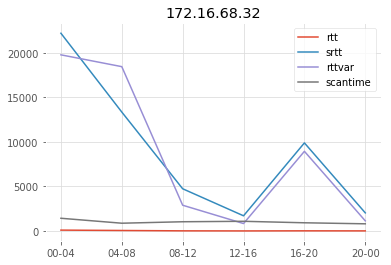

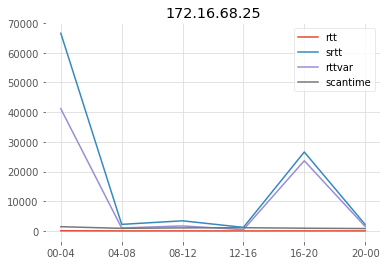

rtt



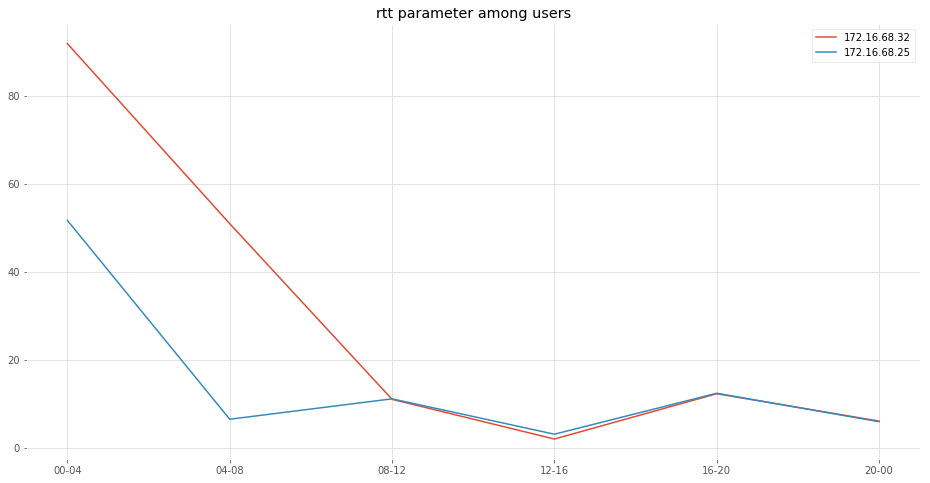

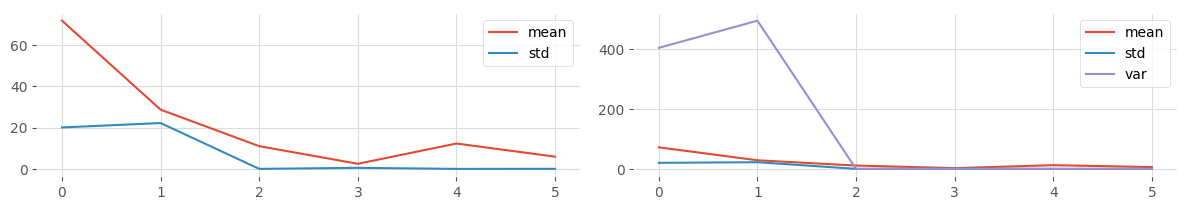

In [212]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/Incrementby2/")
plot_parameters("rtt","Pickles/Incrementby2/")

Mean Corr
[[ 1.          0.84605449  0.8868255   0.67156705]
 [ 0.84605449  1.          0.9862594   0.84753104]
 [ 0.8868255   0.9862594   1.          0.81076216]
 [ 0.67156705  0.84753104  0.81076216  1.        ]]



Individual Corr
OrderedDict([('172.16.68.11', [[51.03, 9.39, 54.31, 1.6600000000000001, 13.48, 4.11], [50843.0, 4782.0, 11195.0, 1101.0, 8556.0, 3718.0], [51569.0, 4365.0, 15961.0, 489.0, 4724.0, 3411.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.15', [[49.5, 30.580000000000002, 15.190000000000001, 2.2600000000000002, 7.9399999999999995, 6.7], [63245.0, 9247.0, 6585.0, 2044.0, 11712.0, 2157.0], [74032.0, 11257.0, 3711.0, 1467.0, 10112.0, 1225.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.6', [[81.53, 7.33, 12.33, 3.74, 53.54, 6.0], [29624.0, 4242.0, 3240.0, 1226.0, 11276.0, 1588.0], [23126.0, 3567.0, 2033.0, 852.0, 14141.0, 1168.0], [1423, 867, 1031, 1082, 915, 800]])])
172.16.68.11
[[ 1.          0.71147466  0.78461952  0.65851001]
 [ 0.71147466  1.        

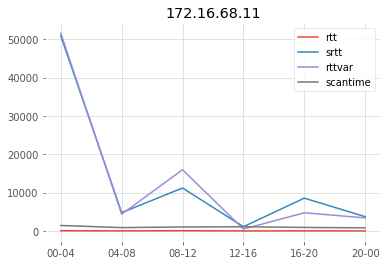

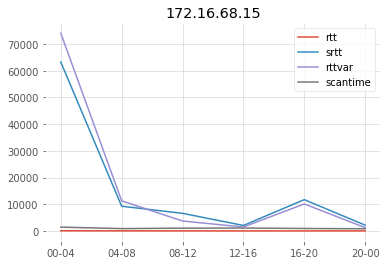

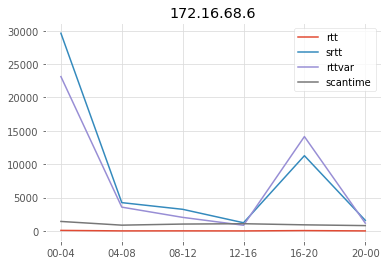

rtt



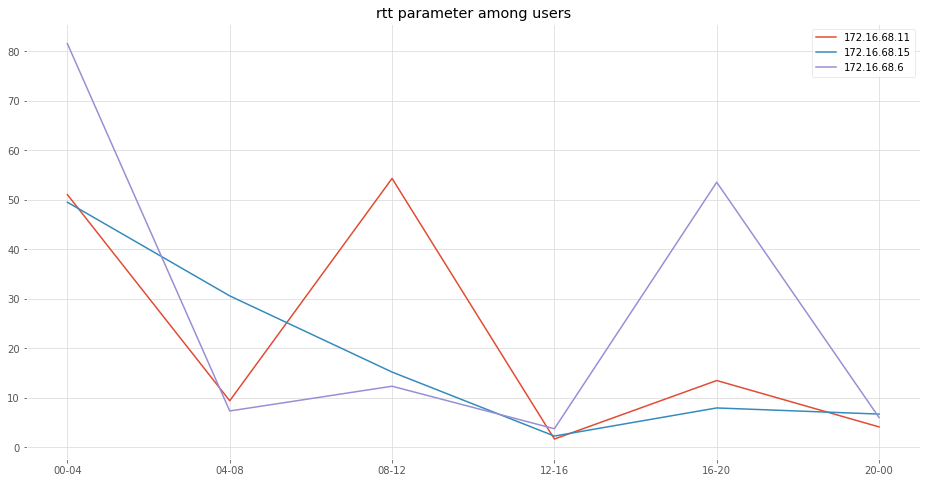

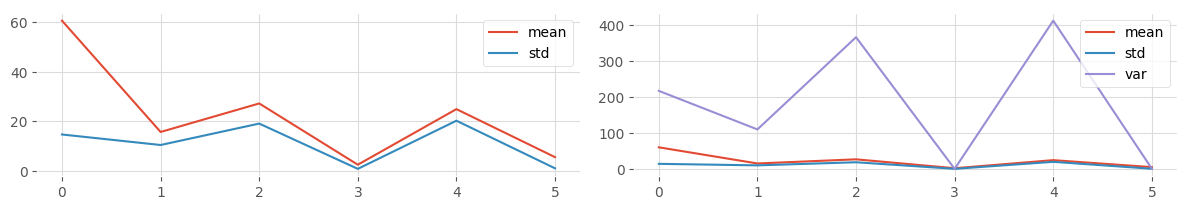

In [214]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/Allzeros/")
plot_parameters("rtt","Pickles/Allzeros/")

Mean Corr
[[ 1.          0.92598952  0.92241456  0.87851732]
 [ 0.92598952  1.          0.97756707  0.85807456]
 [ 0.92241456  0.97756707  1.          0.86639062]
 [ 0.87851732  0.85807456  0.86639062  1.        ]]



Individual Corr
OrderedDict([('172.16.68.13', [[221.66000000000003, 11.85, 19.29, 3.77, 16.98, 7.95], [62294.0, 3922.0, 5010.0, 1154.0, 7486.0, 2414.0], [61725.0, 2748.0, 4848.0, 585.0, 5020.0, 1916.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.30', [[65.44, 6.470000000000001, 11.05, 2.33, 12.280000000000001, 6.87], [69374.0, 4410.0, 4649.0, 2022.0, 8309.0, 2588.0], [38386.0, 4388.0, 2874.0, 835.0, 9137.0, 2087.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.9', [[215.76, 11.870000000000001, 8.54, 3.0, 11.309999999999999, 4.5600000000000005], [72480.0, 4999.0, 4758.0, 2491.0, 19766.0, 1646.0], [59936.0, 3192.0, 2776.0, 2131.0, 17822.0, 868.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.14', [[170.89, 4.63, 75.29, 1.9900000000000002, 22.63, 7.48], [43288.

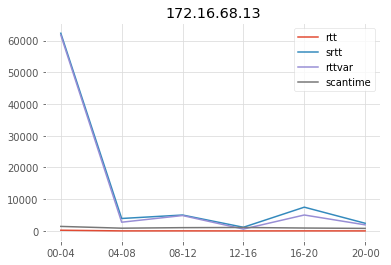

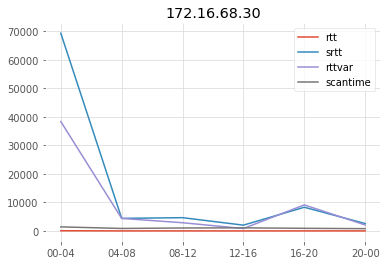

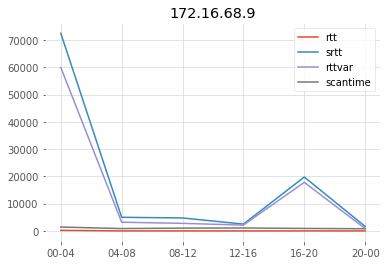

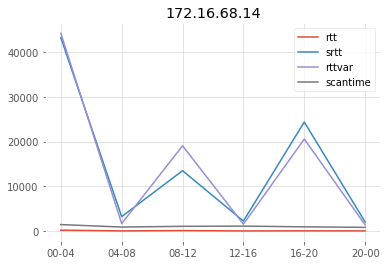

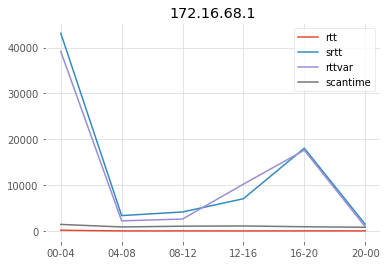

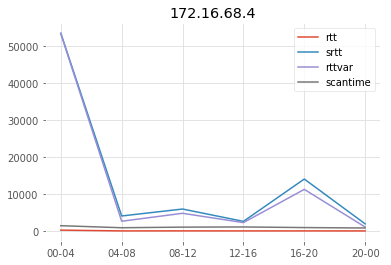

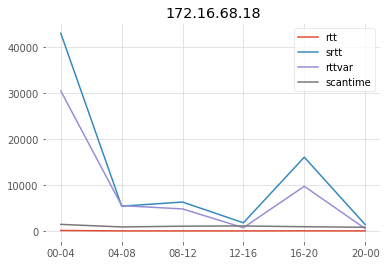

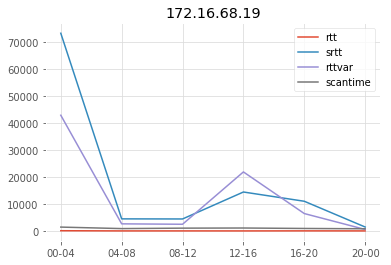

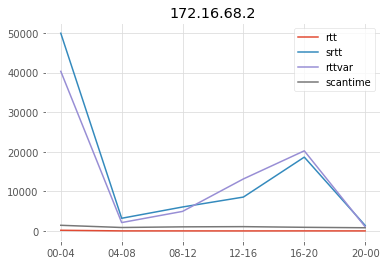

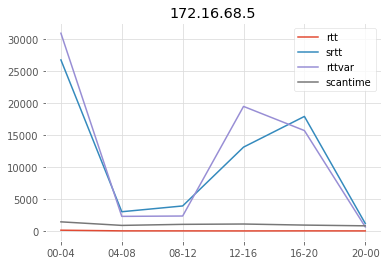

rtt



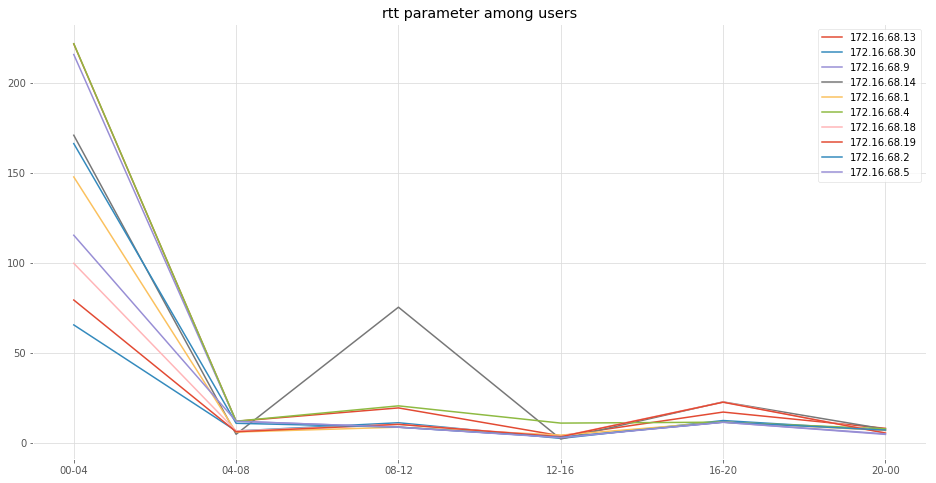

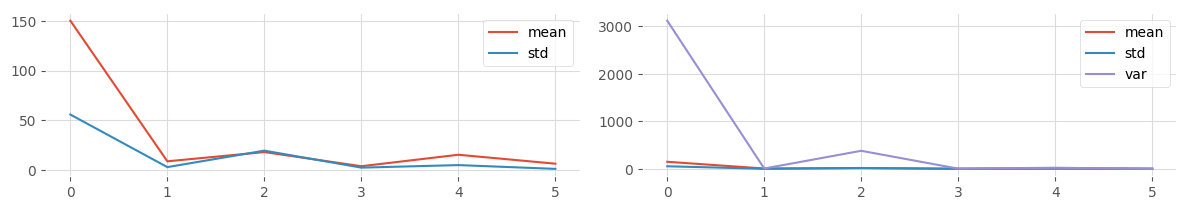

In [216]:

rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/Incremental/")
plot_parameters("rtt","Pickles/Incremental/")

Mean Corr
[[ 1.          0.89422651  0.91677017  0.88321976]
 [ 0.89422651  1.          0.97083417  0.8598281 ]
 [ 0.91677017  0.97083417  1.          0.86761428]
 [ 0.88321976  0.8598281   0.86761428  1.        ]]



Individual Corr
OrderedDict([('172.16.68.4', [[221.79000000000002, 11.91, 20.44, 10.85, 11.370000000000001, 7.69], [53540.0, 4056.0, 5933.0, 2592.0, 14055.0, 1916.0], [53441.0, 2628.0, 4781.0, 2254.0, 11259.0, 1057.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.31', [[91.89, 6.470000000000001, 64.92999999999999], [41272.0, 4506.0, 9625.0], [25119.0, 3608.0, 15564.0], [1423, 867, 1031]]), ('172.16.68.9', [[215.76, 11.870000000000001, 8.54, 3.0, 11.309999999999999, 4.5600000000000005], [72480.0, 4999.0, 4758.0, 2491.0, 19766.0, 1646.0], [59936.0, 3192.0, 2776.0, 2131.0, 17822.0, 868.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.2', [[166.24, 10.74, 8.620000000000001, 2.9, 11.41, 6.96], [49923.0, 3197.0, 6045.0, 8550.0, 18638.0, 1386.0], [40298.0, 2111.0, 4931.0

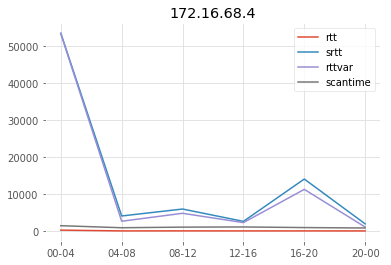

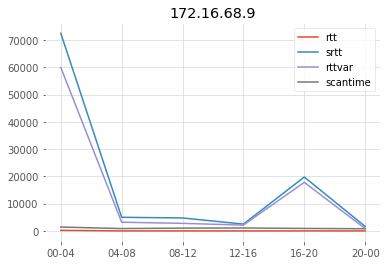

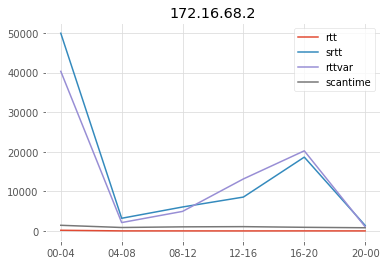

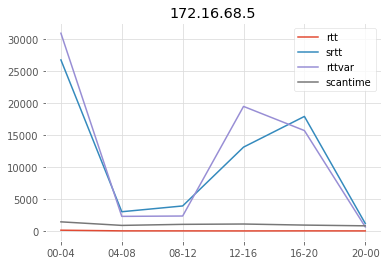

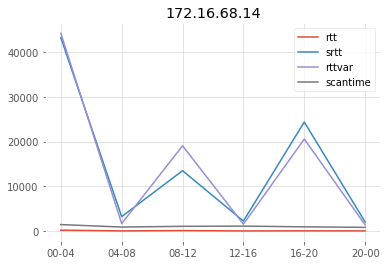

rtt



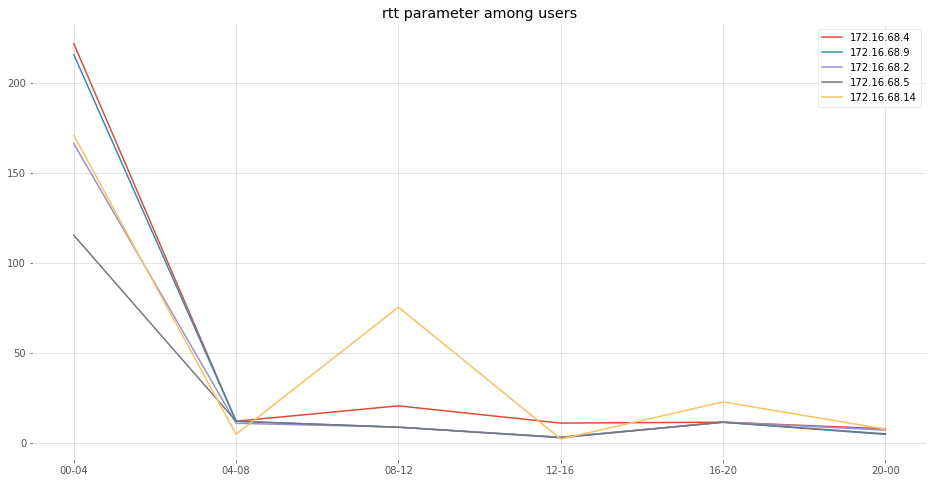

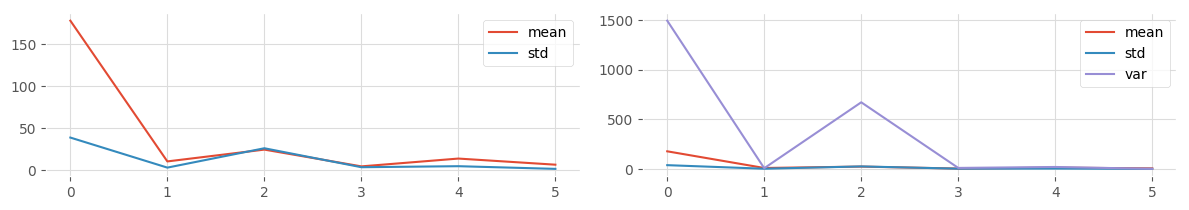

In [217]:

rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/zerotimestamp/")
plot_parameters("rtt","Pickles/zerotimestamp/")

Mean Corr
[[ 1.          0.95134131  0.92389607  0.85224393]
 [ 0.95134131  1.          0.98182879  0.81703713]
 [ 0.92389607  0.98182879  1.          0.79326237]
 [ 0.85224393  0.81703713  0.79326237  1.        ]]



Individual Corr
OrderedDict([('172.16.68.32', [[91.84, 50.919999999999995, 10.99, 1.96, 12.26, 6.04], [22197.0, 13348.0, 4735.0, 1699.0, 9884.0, 2028.0], [19773.0, 18446.0, 2887.0, 829.0, 8939.0, 1133.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.1', [[147.7, 5.859999999999999, 8.58, 4.17, 11.469999999999999, 6.73], [43119.0, 3348.0, 4133.0, 7025.0, 18040.0, 1471.0], [39136.0, 2200.0, 2591.0, 10201.0, 17615.0, 933.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.13', [[221.66000000000003, 11.85, 19.29, 3.77, 16.98, 7.95], [62294.0, 3922.0, 5010.0, 1154.0, 7486.0, 2414.0], [61725.0, 2748.0, 4848.0, 585.0, 5020.0, 1916.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.19', [[79.28, 6.04, 10.14, 3.2600000000000002, 22.46, 5.29], [73400.0, 4477.0, 4439.0, 14450.

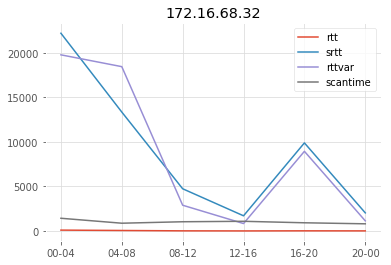

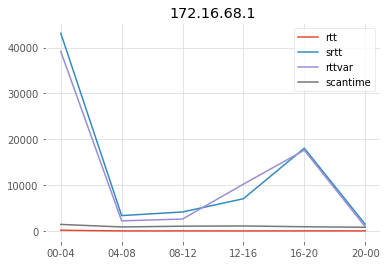

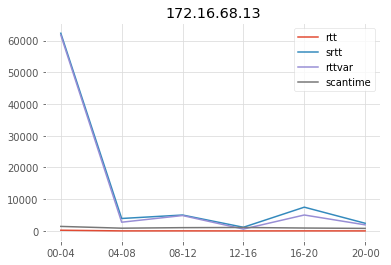

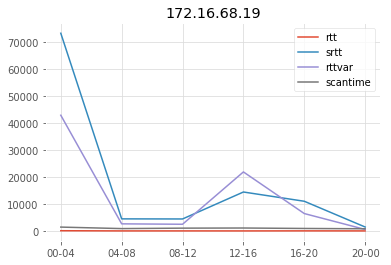

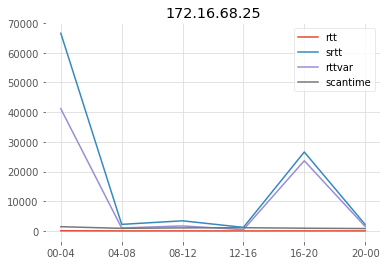

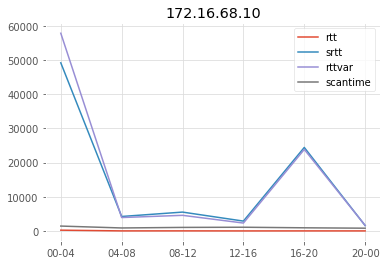

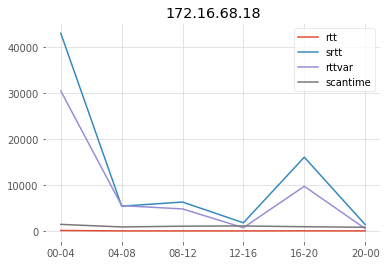

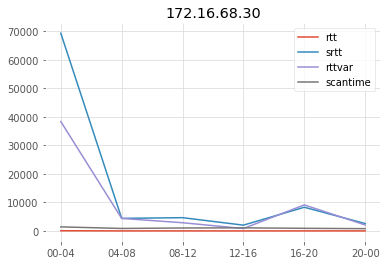

rtt



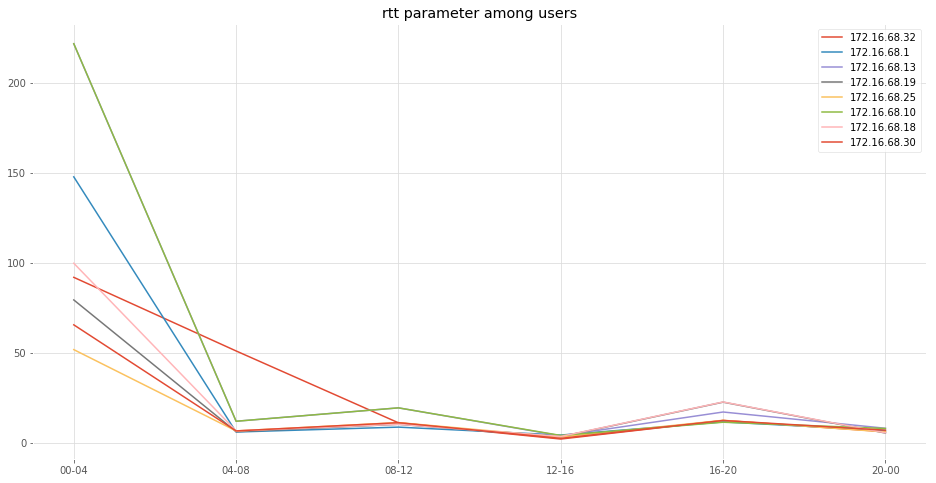

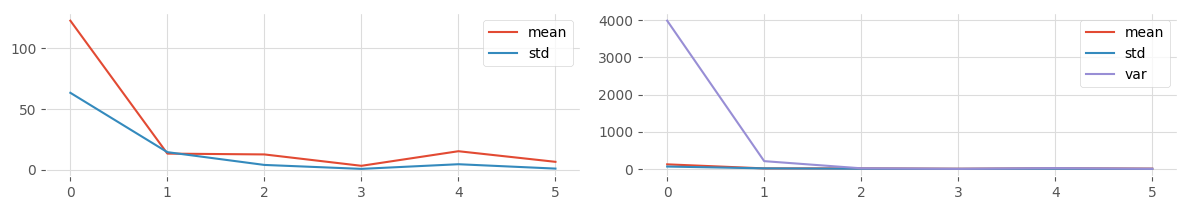

In [219]:
rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/100HZ/")
plot_parameters("rtt","Pickles/100HZ/")

Mean Corr
[[ 1.          0.91334441  0.93792849  0.67809557]
 [ 0.91334441  1.          0.98433721  0.83405505]
 [ 0.93792849  0.98433721  1.          0.77571386]
 [ 0.67809557  0.83405505  0.77571386  1.        ]]



Individual Corr
OrderedDict([('172.16.68.15', [[49.5, 30.580000000000002, 15.190000000000001, 2.2600000000000002, 7.9399999999999995, 6.7], [63245.0, 9247.0, 6585.0, 2044.0, 11712.0, 2157.0], [74032.0, 11257.0, 3711.0, 1467.0, 10112.0, 1225.0], [1423, 867, 1031, 1082, 915, 800]]), ('172.16.68.6', [[81.53, 7.33, 12.33, 3.74, 53.54, 6.0], [29624.0, 4242.0, 3240.0, 1226.0, 11276.0, 1588.0], [23126.0, 3567.0, 2033.0, 852.0, 14141.0, 1168.0], [1423, 867, 1031, 1082, 915, 800]])])
172.16.68.15
[[ 1.          0.86975418  0.88209086  0.65979529]
 [ 0.86975418  1.          0.99816231  0.86000989]
 [ 0.88209086  0.99816231  1.          0.85351614]
 [ 0.65979529  0.86000989  0.85351614  1.        ]]
172.16.68.6
[[ 1.          0.95693463  0.99376613  0.69639585]
 [ 0.95693463  1.    

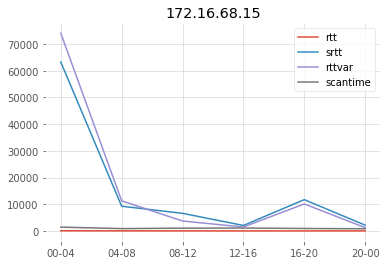

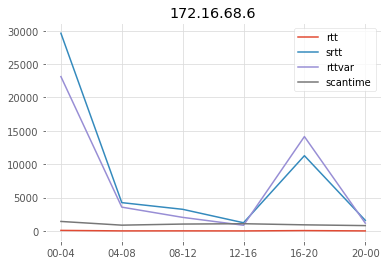

rtt



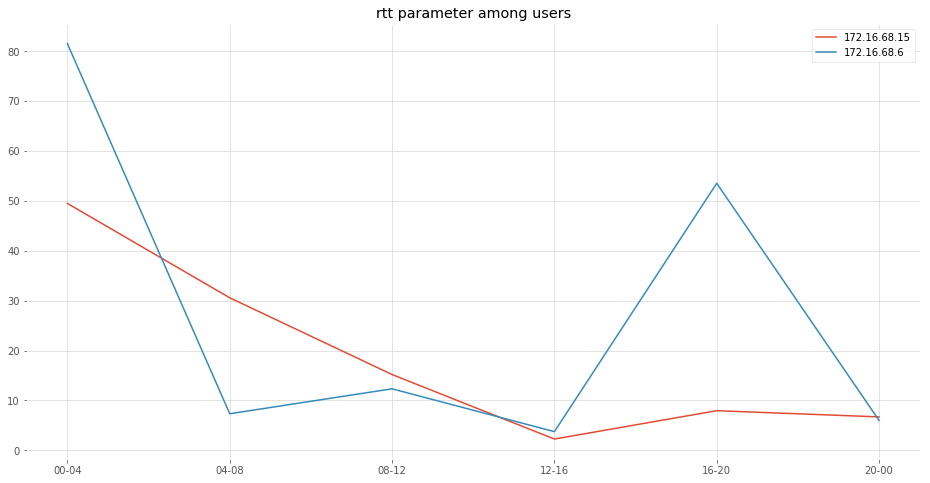

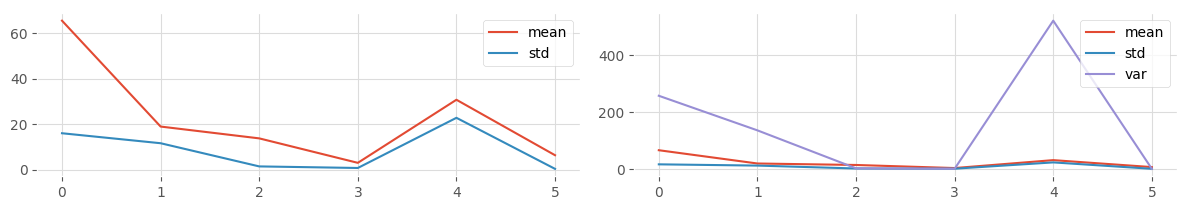

In [220]:

rtt_data=analyze_and_plotcorr(["rtt","srtt","rttvar","scantime"],"Pickles/nonereturned/")
plot_parameters("rtt","Pickles/nonereturned/")

In [133]:
def plot_bar_graph(parameter,path,ss):
    data=pickle.load(open(path+ss+".pickle","rb"))
    #print(data)
    x,y=[],[]
    parameter=datamap["uptime"]
    for ipv4 in data:
        if data[ipv4][parameter]!=None:
            x.append(ipv4)
            y.append(data[ipv4][parameter])
            #print(ipv4,data[ipv4][parameter])
    plt.close()
    plt.clf()
    xx=[i for i in range(len(y))]
    plt.bar(xx,y)
    plt.xticks(xx,x,rotation=30)
    plt.show()

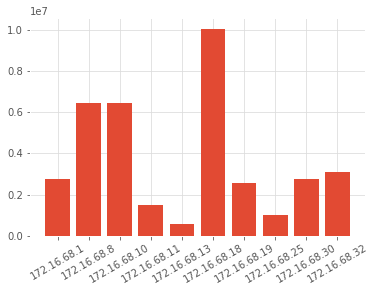

In [134]:
plot_bar_graph("","Pickles/","1")
